# 178 HW1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value (iris species) is the last column 
X = iris[:,0:-1]        

Question1:

In [2]:
#1.1
a,b = X.shape
print(a) #data point
print(b) #number of features

148
4


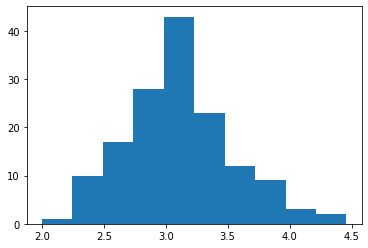

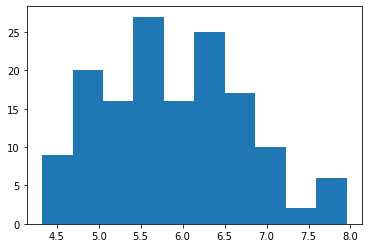

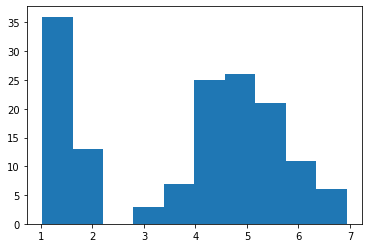

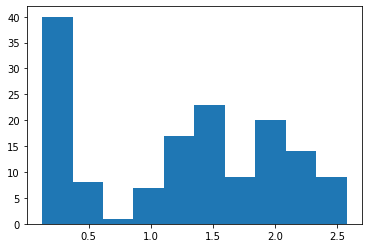

In [3]:
#1.2
for i in range(b):
    plt.hist( X[:,i])
    plt.show()

1.3

In [4]:
np.mean(X,axis=0)

array([3.09893092, 5.90010376, 3.81955484, 1.25255548])

In [5]:
np.std(X,axis=0)

array([0.43629184, 0.83340207, 1.75405711, 0.75877246])

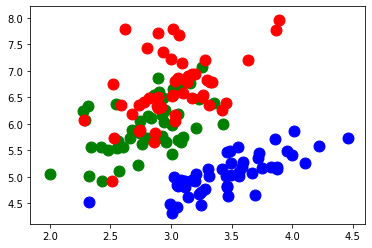

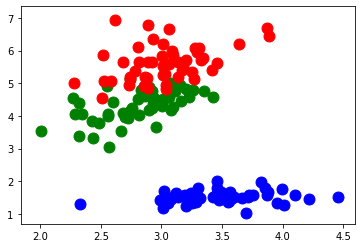

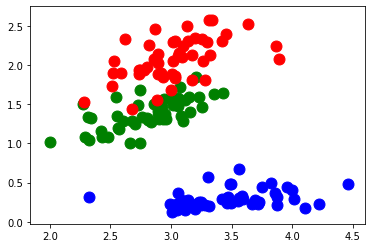

In [6]:
#1.4
colors = ['blue', 'green', 'red']

for i in range(1,b):
    for c in np.unique(Y):
        mask = Y == c  # Finding the right points
        plt.scatter(X[mask, 0], X[mask, i], s=120, c=colors[int(c)])
    plt.show()

Question2:

In [7]:
import mltools as ml
np.random.seed(0) # set the random number seed
X,Y = ml.shuffleData(X,Y); # shuffle data randomly
# (This is a good idea in case your data are ordered in some systematic way.)
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75); # split data into 75/25 train/validation

knn = ml.knn.knnClassify() # create the object and train it
knn.train(Xtr, Ytr, 1) # where K is an integer, e.g. 1 for nearest neighbor prediction
YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xva


knn = ml.knn.knnClassify( Xtr, Ytr, 1); YvaHat = predict( knn, Xva );

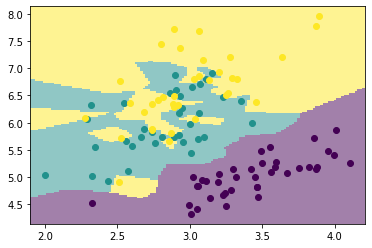

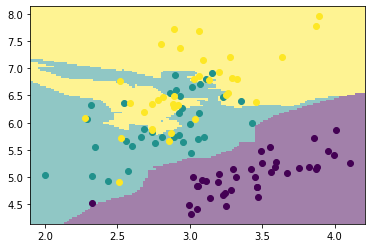

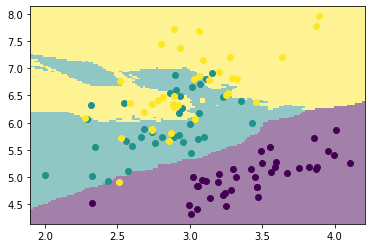

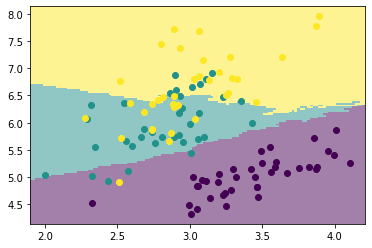

In [8]:
#2.1

for k in [1, 5, 10, 50]:
    knn = ml.knn.knnClassify() 
    knn.train(Xtr[:,:2],Ytr,k)
    ml.plotClassify2D(knn, Xtr[:,:2],Ytr)
    plt.show()

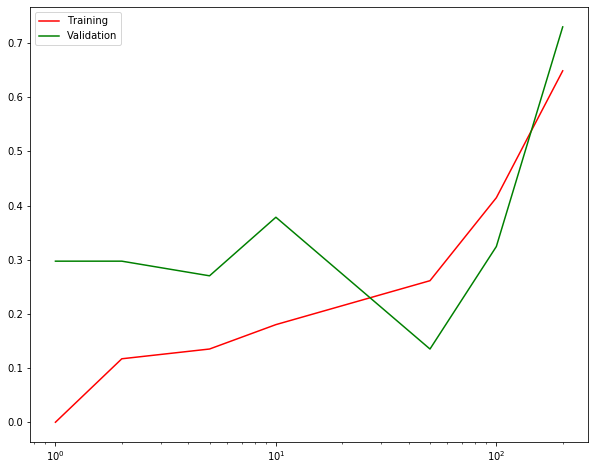

In [9]:
#2.2

k1= [1, 2, 5, 10, 50, 100, 200]
fig,ax = plt.subplots(1,1,figsize=(10,8))
errTrain = np.zeros((len(k1),))
errValid= np.zeros((len(k1),))
for i,k in enumerate(k1): 
    learner = ml.knn.knnClassify( Xtr[:,:2], Ytr, k)
    Yhat = learner.predict(Xtr[:,:2])
    errTrain[i] = learner.err(Xtr[:,:2],Ytr) 
    errValid[i] = learner.err(Xva[:,:2],Yva)
plt.semilogx(k1,errTrain,'r-',k1,errValid,'g-') 
plt.legend(['Training','Validation'])
plt.show()

From the plot above, we can know that k=50 is the best case

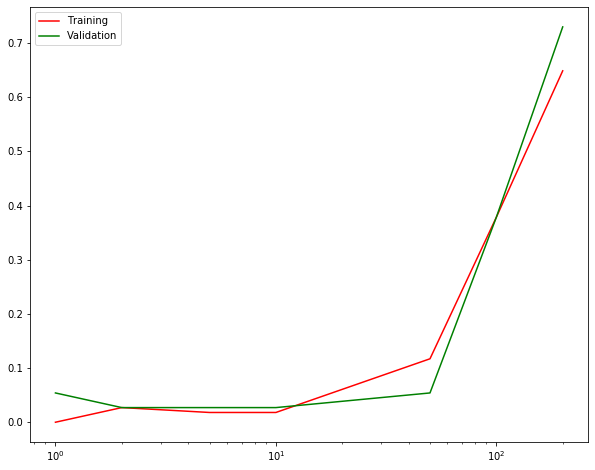

1


In [10]:
#2.3
k1= [1, 2, 5, 10, 50, 100, 200]
fig,ax = plt.subplots(1,1,figsize=(10,8))
errTrain = np.zeros((len(k1),))
errValid= np.zeros((len(k1),))
for i,k in enumerate(k1): 
    learner = ml.knn.knnClassify( Xtr, Ytr, k)
    Yhat = learner.predict(Xtr)
    errTrain[i] = learner.err(Xtr,Ytr)        
    errValid[i] = learner.err(Xva,Yva)
plt.semilogx(k1,errTrain,'r-',k1,errValid,'g-') 
plt.legend(['Training','Validation'])
plt.show()
print(errValid.argmin())

The plot is different from previous plot, and the best value for k also different. 
From the plot and errValid,argmin() above, we can know that the index 1 position,which is k=2, is the best case, which is also different from previous plot. 

Question3:

#3.1

In [11]:

py=6/10 #y=-1 class

p_x1_y0=3/6
p_x2_y0=5/6
p_x3_y0=4/6
p_x4_y0=5/6
p_x5_y0=2/6


p_y=4/10 #y=1 class

p_x1_y1=3/4
p_x2_y1=0/4
p_x3_y1=3/4
p_x4_y1=2/4
p_x5_y1=1/4



In [12]:
print("p(x|y=-1)=",p_x1_y0*p_x2_y0*p_x3_y0*p_x4_y0*p_x5_y0)

p(x|y=-1)= 0.0771604938271605


In [13]:
print("p(x|y=+1)=",p_x1_y1*p_x2_y1*p_x3_y1*p_x4_y1*p_x5_y1)

p(x|y=+1)= 0.0


3.2

In [14]:
p1_00000 = p_y*(1-p_x1_y1)*(1-p_x2_y1)*(1-p_x3_y1)*(1-p_x4_y1)*(1-p_x5_y1) 
p0_00000 = (1-p_y)*(1-p_x1_y0)*(1-p_x2_y0)*(1-p_x3_y0)*(1-p_x4_y0)*(1-p_x5_y0)
print(p1_00000)
print(p0_00000)
Poster_00000=p_y*(1-p_x1_y1)*(1-p_x2_y1)*(1-p_x3_y1)*(1-p_x4_y1)*(1-p_x5_y1)/(p1_00000+p0_00000)
print("Posterior probability of x=00000 is ",Poster_00000)

0.009375000000000001
0.0018518518518518515
Posterior probability of x=00000 is  0.8350515463917526


Posterior prob for x=00000 is 0.8350515463917526

In [16]:
p1_11010=p_y*(p_x1_y1)*p_x2_y1*(1-p_x3_y1)*p_x4_y1*(1-p_x5_y1)
p0_11010=(1-p_y)*(p_x1_y0)*(p_x2_y0)*(1-p_x3_y0)*(p_x4_y0)*(1-p_x5_y0)
print(p1_11010)
print(p0_11010)
Poster_11010=p_y*(p_x1_y1)*p_x2_y1*(1-p_x3_y1)*p_x4_y1*(1-p_x5_y1)/(p1_11010+p0_11010)
print("Posterior probability of x=11010 is ",Poster_11010)

0.0
0.046296296296296315
Posterior probability of x=11010 is  0.0


Posterior prob for x=11010 is 0.0

3.3

Since p1_00000>p0_00000, y=+1 will be predicted for x=00000

since p0_11010>p1_11010, y=-1 will be predicted for x=11010

3.4 
since for the joint bayes, features are not independent related, so it will cost more number of features during the process of calculating than the naive bayes way,  which is not suitable for this data since the data point are too small that the feature probability may be assigned to 0 with the joint bayes method. . 

3.5
No, since features are independent related within each other, so the loss of x1 will not affact others. so we can reuse the individual probability calculated in 3.1 with the feature x1 probability deleted(p_x1_y0=3/6 and p_x1_y1=3/4 ), and no need to use the raw data to recalculate all the individual probability again. 

Question4

I discuss this hw with Liu tianle and Yan yuling about lecture pdf, discussion, code and talks about the meaning of each question to make sure that we do not misunderstand the requirements of each question before we start our hw. 